In [38]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

In [39]:
data_path='./dataset/self-built-masked-face-recognition-dataset/'

#Getting the folder names
categories=os.listdir(data_path) 
print(categories)

# Generating a label for each class
labels = []
for i in range(len(categories)):
    labels.append(i)
print(labels)

# Attach the label to each class with name
label_dict = {}
for i in range(len(categories)):
    label_dict[categories[i]] = labels[i]
    
print(label_dict)

['without_mask', 'with_mask']
[0, 1]
{'without_mask': 0, 'with_mask': 1}


In [40]:
def drawImg(img):
    plt.style.use("seaborn")
    plt.imshow(img,cmap='gray')
    plt.grid(False)
    plt.show()

In [41]:
categories

['without_mask', 'with_mask']

0


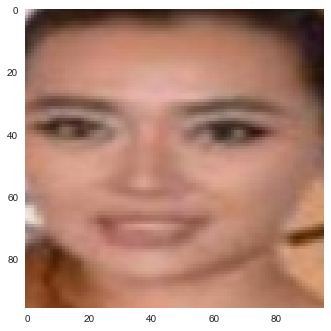

1000


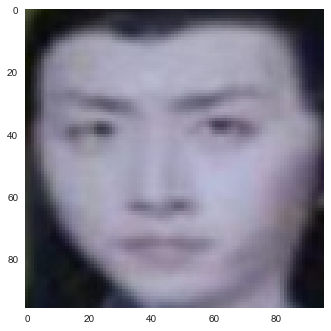

2000


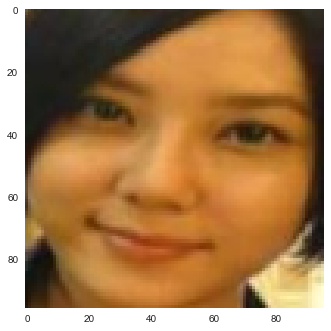

3000


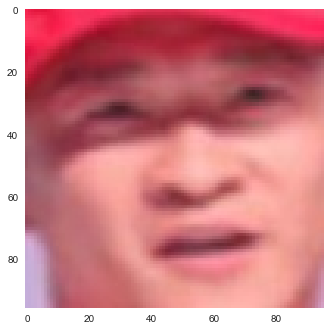

4000


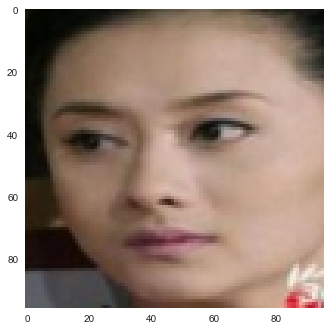

5000


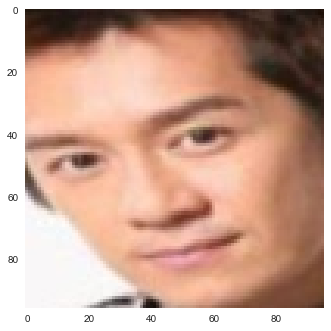

6000


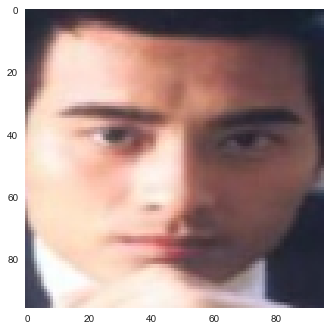

7000


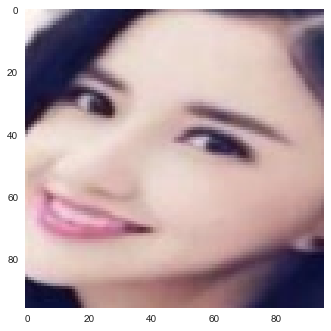

8000


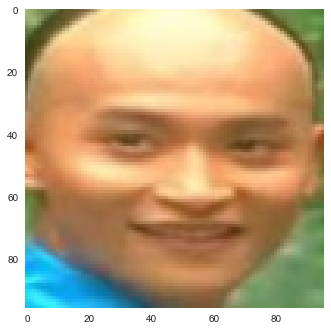

9000


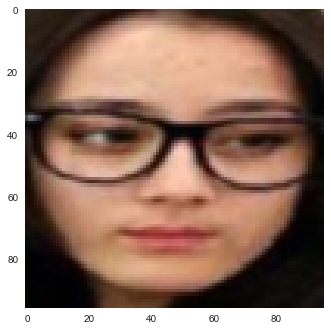

10000


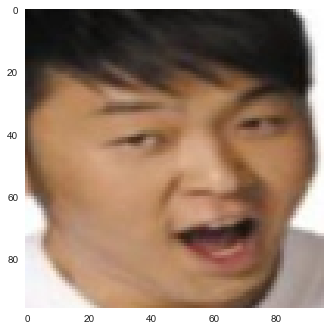

11000


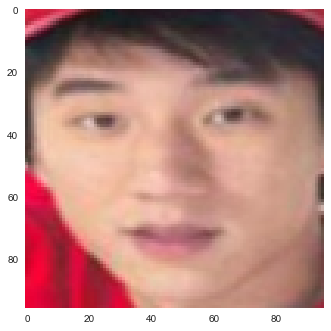

12000


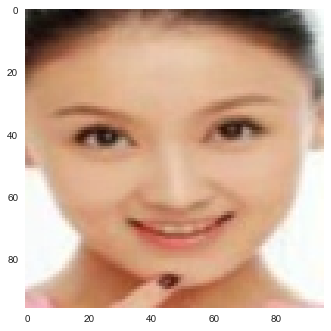

13000


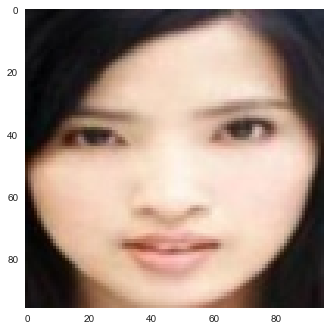

14000


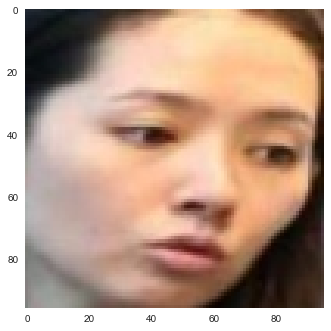

15000


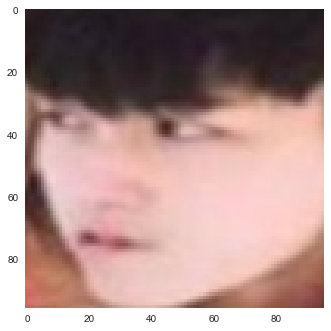

16000


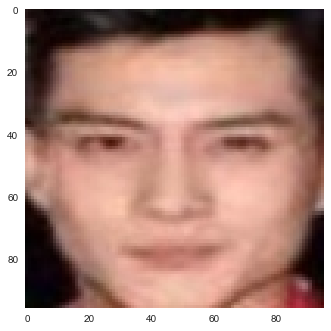

17000


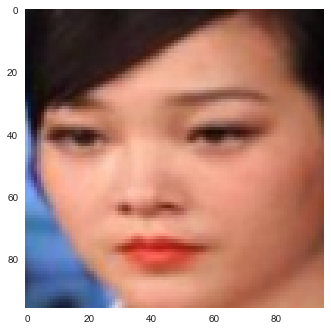

18000


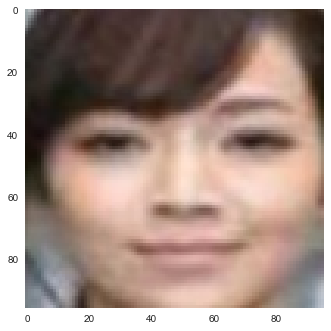

19000


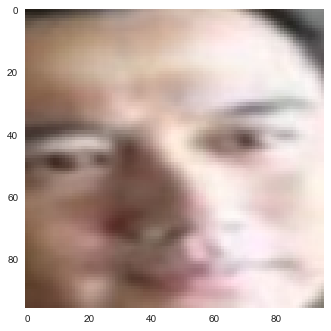

20000


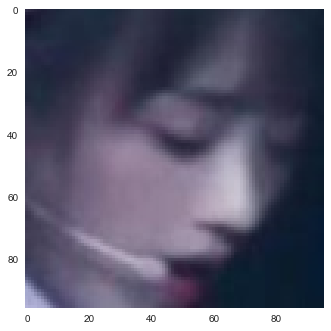

21000


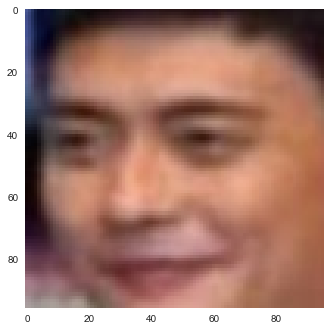

22000


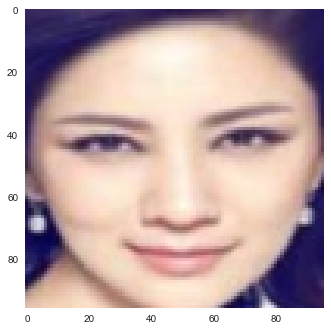

23000


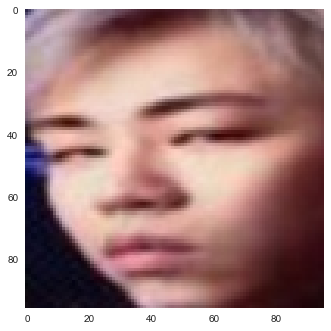

24000


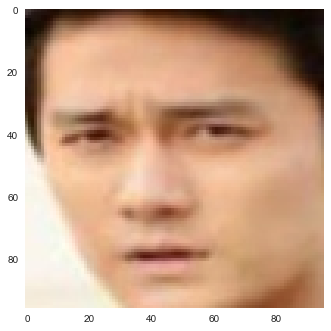

25000


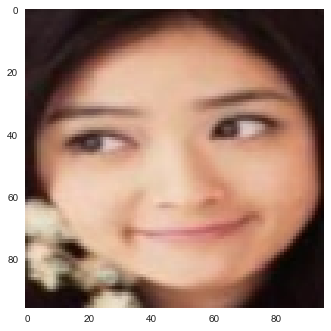

26000


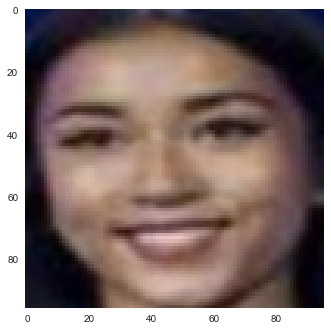

27000


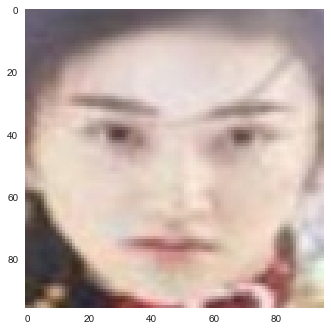

28000


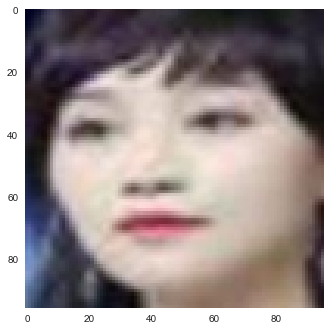

29000


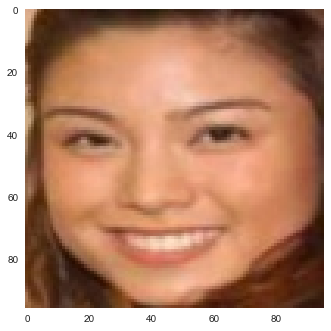

30000


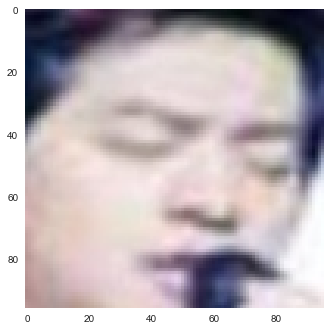

31000


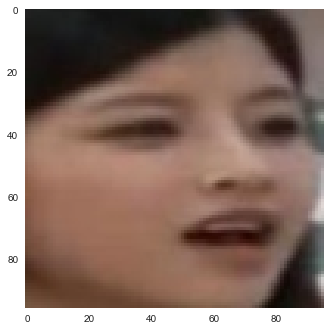

32000


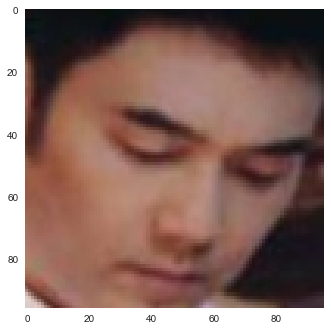

33000


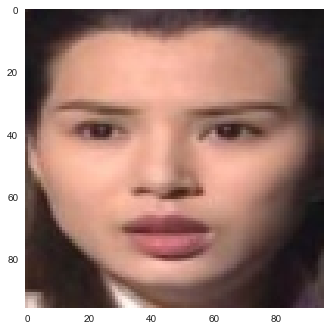

34000


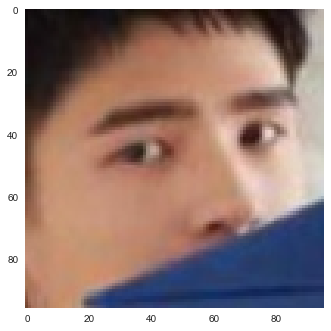

35000


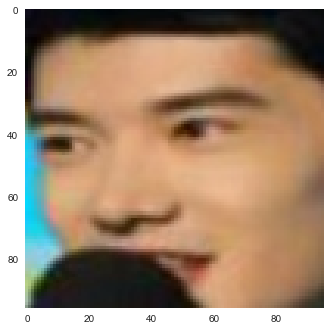

36000


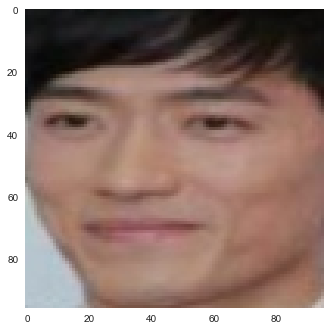

37000


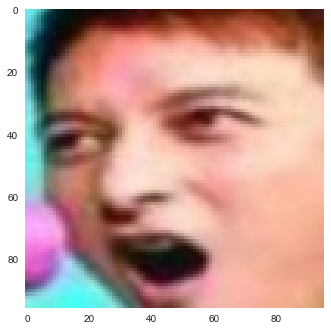

38000


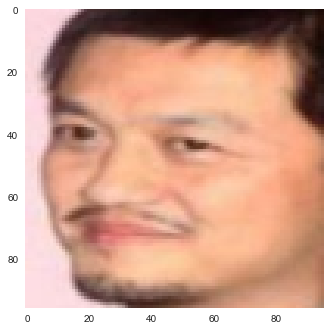

39000


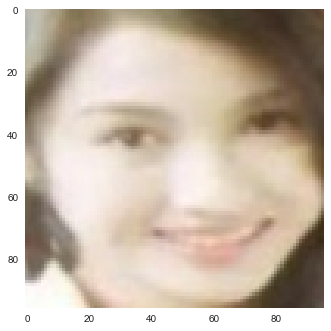

40000


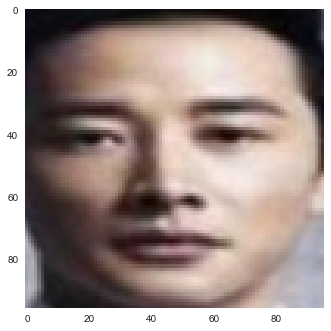

41000


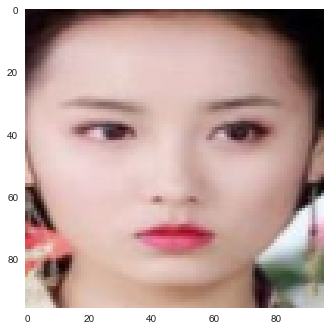

42000


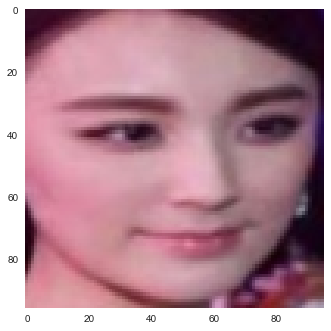

43000


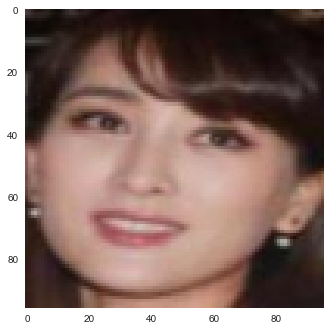

44000


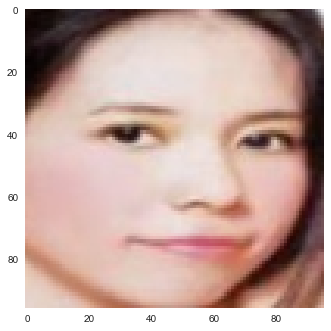

45000


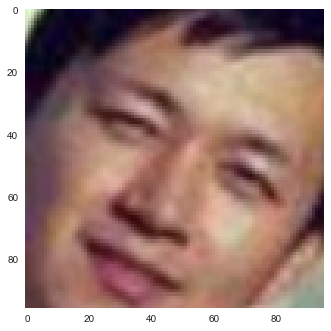

46000


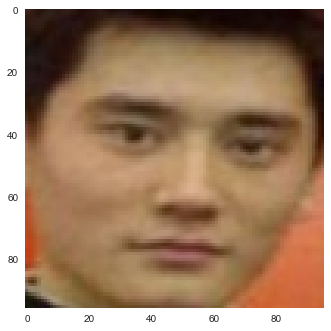

47000


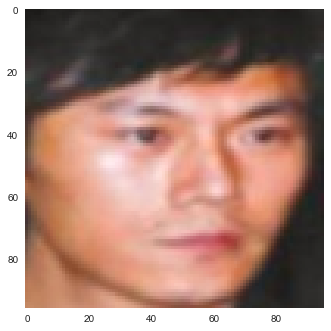

48000


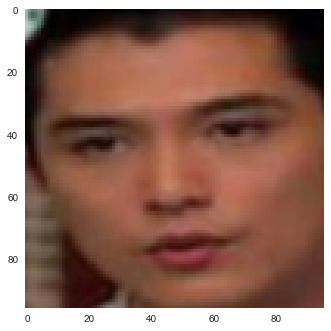

49000


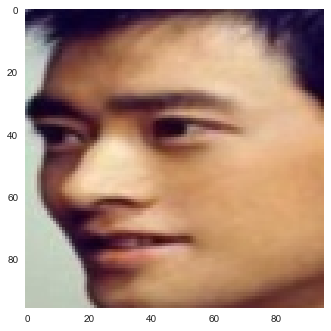

50000


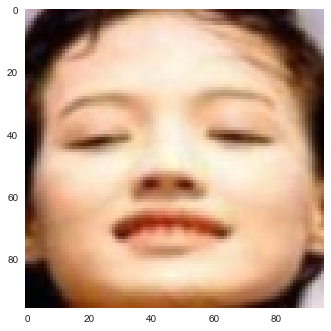

51000


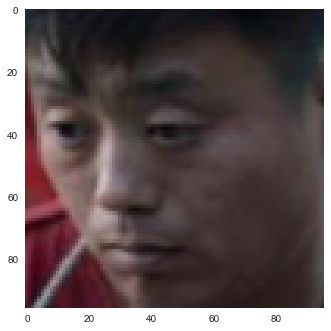

52000


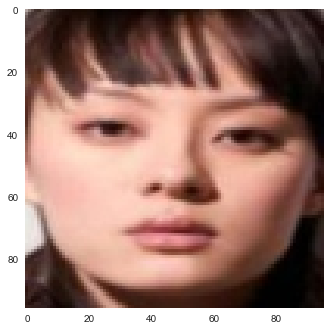

53000


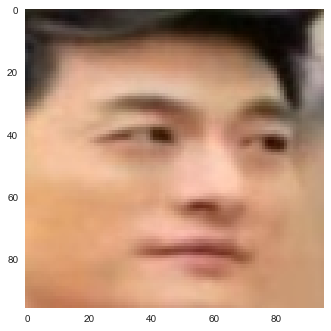

54000


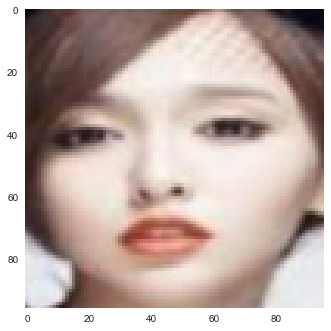

55000


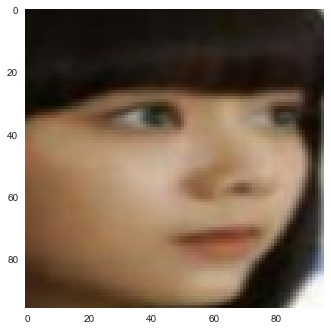

56000


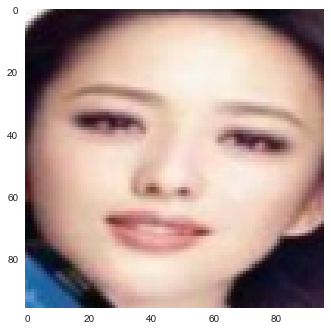

57000


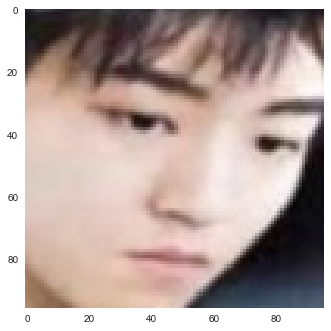

58000


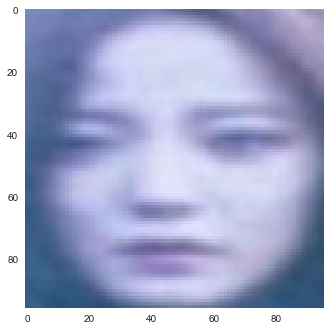

59000


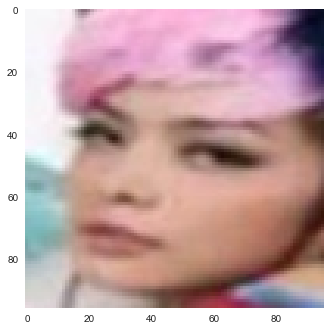

60000


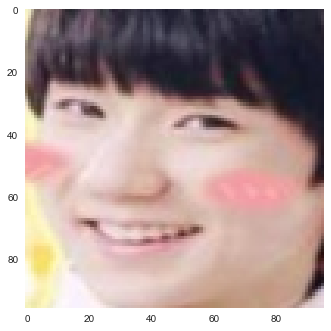

61000


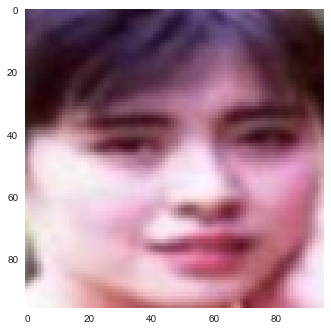

62000


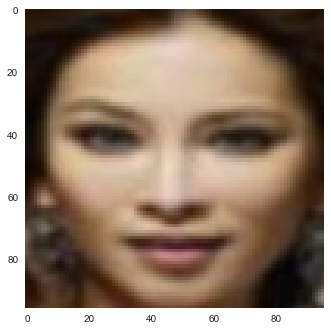

63000


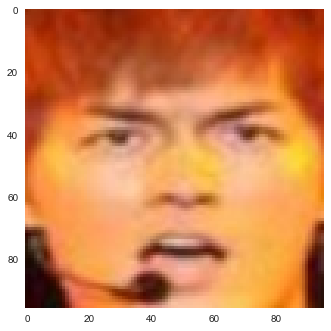

64000


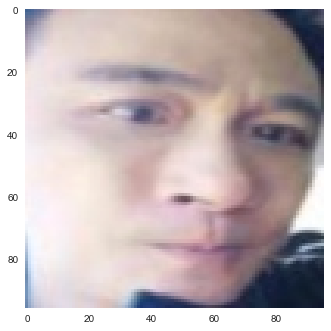

65000


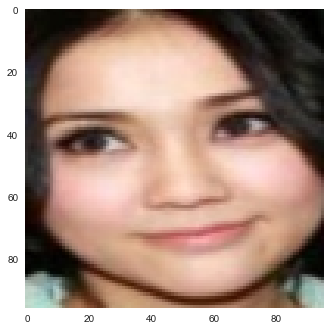

66000


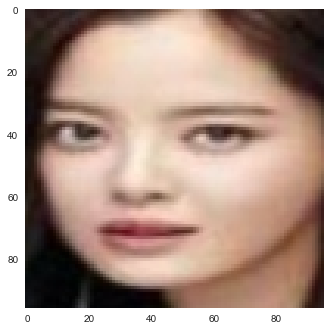

67000


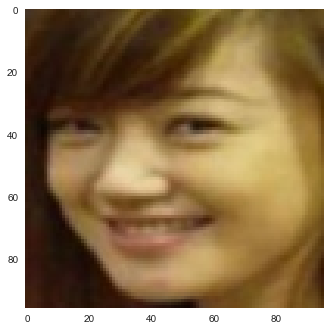

68000


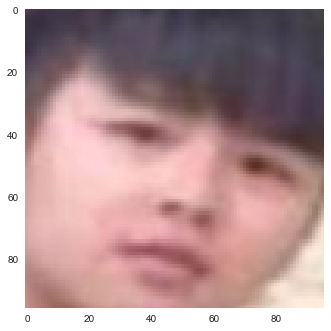

69000


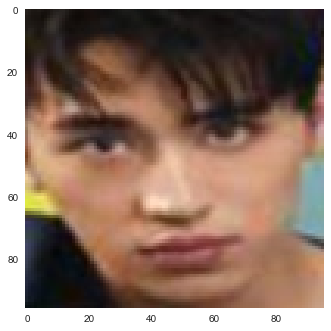

70000


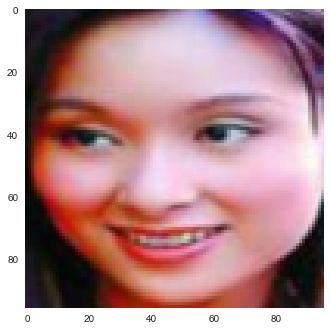

71000


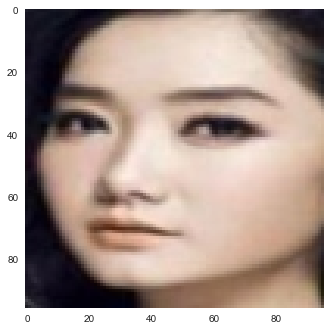

72000


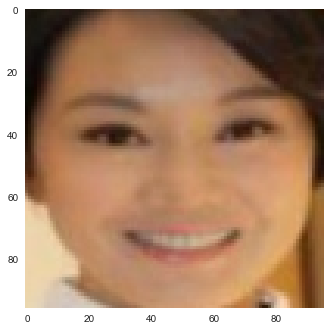

73000


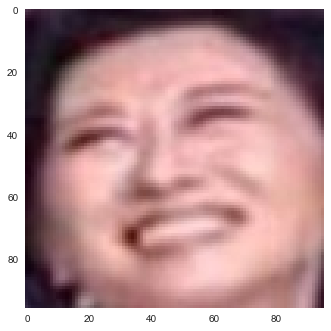

74000


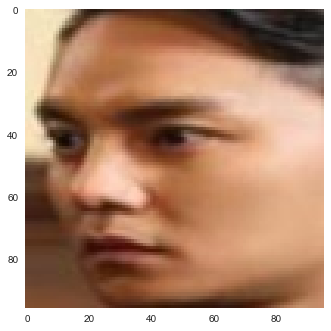

75000


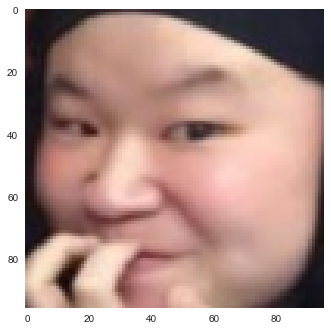

76000


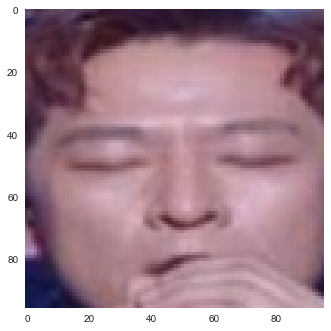

77000


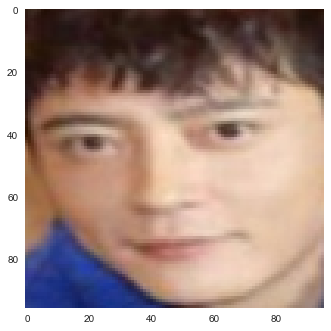

78000


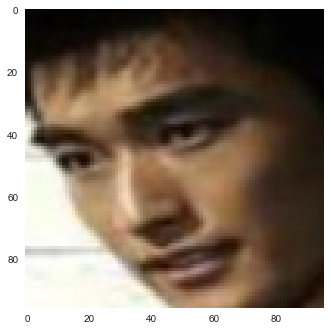

79000


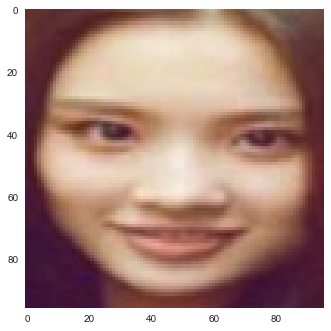

80000


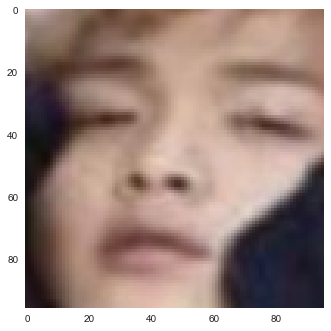

81000


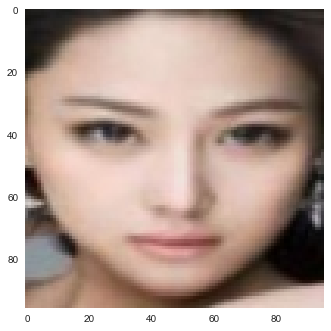

82000


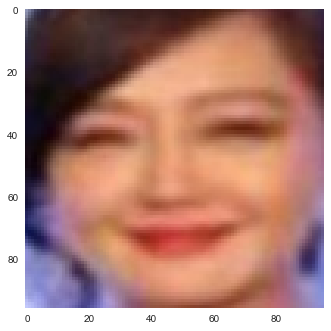

83000


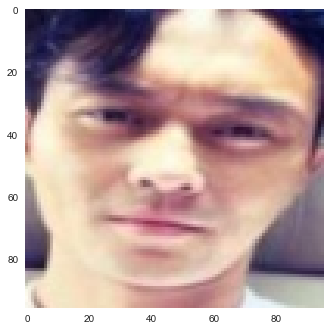

84000


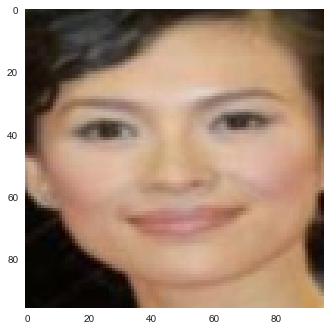

85000


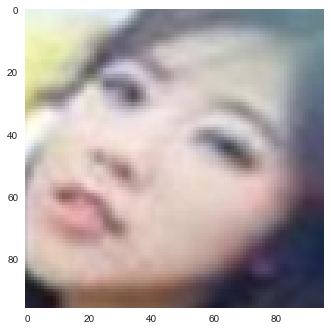

86000


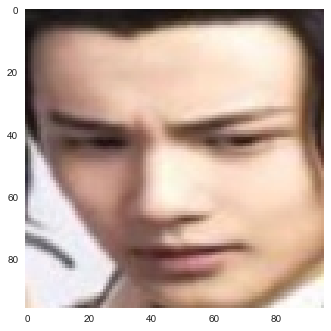

87000


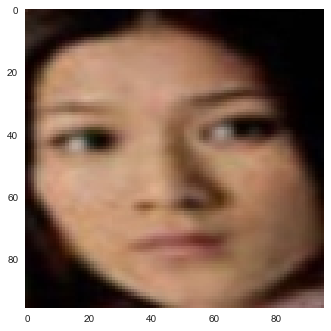

88000


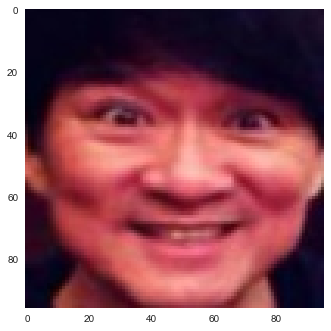

89000


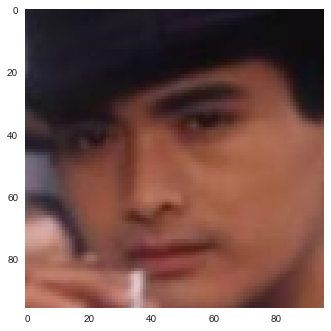

90000


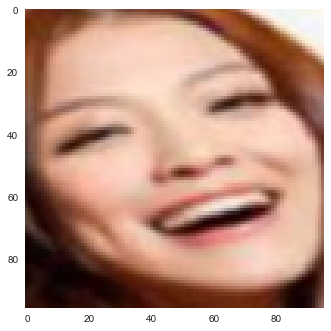

Count-> 90471  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 90472  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 90473  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 90474  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 90500  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\col

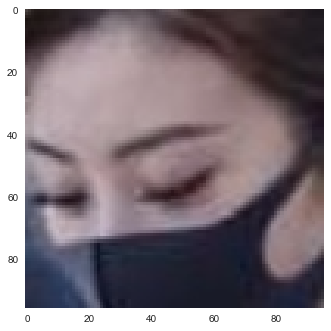

Count-> 91043  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 91045  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 91046  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 91047  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 91172  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\col

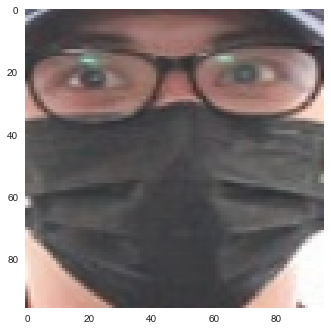

Count-> 92082  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 92083  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 92084  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 92219  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Count-> 92220  Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\col

In [42]:
img_size=96
X=[]
Y=[]
count=0

for category in categories:
    category_path=os.path.join(data_path,category)
#     print(category_path)
    img_folders = os.listdir(category_path)
    for img_folder in img_folders:
#         print(img_folder)
        img_folder_path = os.path.join(category_path,img_folder)
        img_names=os.listdir(img_folder_path)
#         print(img_names)

        for img_name in img_names:
            img_path=os.path.join(img_folder_path,img_name)
            try:
    
                img=cv2.imread(img_path)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img_resized=cv2.resize(img,(img_size,img_size))
                
                if count%1000 == 0:
                    print(count)
                    drawImg(img_resized)    
                    
                count+=1
                
                X.append(img_resized)
                Y.append(label_dict[category])

            except Exception as e:
                print("Count->",count,' Exception:',e)
                count+=1


In [44]:
Y = np.array(Y)
print(Y.shape)

(92618,)


In [45]:
print(np.unique(Y,return_counts=True))

(array([0, 1]), array([90468,  2150], dtype=int64))


In [46]:
x = X[88000:]
x = np.array(x)
print(x.shape)

y = Y[88000:]
print(y.shape)

(4618, 96, 96, 3)
(4618,)


In [47]:
print(np.unique(y,return_counts=True))

(array([0, 1]), array([2468, 2150], dtype=int64))


In [48]:
x = np.reshape(x,(4618,-1))
print(x.shape)

y = np.reshape(y,(4618,-1))
print(y.shape)


(4618, 27648)
(4618, 1)


In [49]:
temp = np.hstack((x,y))
print(temp.shape)

(4618, 27649)


In [50]:
print(temp[:5])

[[  6   3  24 ...   9  41   0]
 [ 16  16  16 ... 100  69   0]
 [133 128 150 ... 225 222   0]
 [ 33  19  16 ...  27  30   0]
 [  8  19  11 ...  26  32   0]]


In [51]:
np.random.shuffle(temp)
print(temp[:5])

[[ 79  76  71 ... 127 119   1]
 [ 84  71  62 ... 169 145   1]
 [142 164 177 ... 233 237   1]
 [ 79  70  71 ... 168 182   1]
 [144  94  67 ... 194 170   1]]


In [52]:
x = temp[:,0:27648]
y = temp[:,27648:27649]

print(x.shape,y.shape)

(4618, 27648) (4618, 1)


In [53]:
x = np.reshape(x,(-1,img_size,img_size,3))
print(x.shape)
y = np.reshape(y,(-1,1))
print(y.shape)

(4618, 96, 96, 3)
(4618, 1)


In [54]:
y_onehot = np_utils.to_categorical(y)
print(y_onehot.shape)

(4618, 2)


In [55]:
print("Final Information of the data")

print(x.shape)
print(y_onehot.shape)

Final Information of the data
(4618, 96, 96, 3)
(4618, 2)


In [56]:
np.save('data',x)
np.save('target',y_onehot)